#### ![Kopf-1](images/Kopf-1.png)
![Pyth](images/Pyth-Wire.png)


# Lab: Kryptoanalyse-III


### In diesem Notebook stellen wir Ihnen die programmtechnische Umsetzung von grundlegenden Angriffsmöglichkeiten auf ein RSA-Key-Paar vor.
## Voraussetzungen
* ### Python-Scriptvorschlaege
* ### Python (AnacondaFramework, Jupyter-Notebook)



### RSA's Sicherheit mit seinem Key-Paar:
### $$ \color{Red}{K _{pub} = (n, e )~und~K _{pri} = (n, d )}$$
### beruht auf der Größe der Primzahlen, die für die Berechnung des Moduls eingesetzt werden, ebenso spielt der Abstand der Primzahlen eine wichtige Rolle.
## $$ \color{Red}{n= p\cdot q} $$ 
### Die Methodik zur Berechnung der Primzahlen aus dem Modul wird allgemein als Faktorisierung bezeichnet. Da das Modul öffentlich ist, können dann daraus die Primzahlen berechnet werden. Über das öffentliche "e" kann dann der private Key "d" berechnet werden. Gelingt die Faktorisierung, so ist der RSA-Mechanismus gebrochen. Dazu gab es verschiedene Challenges!
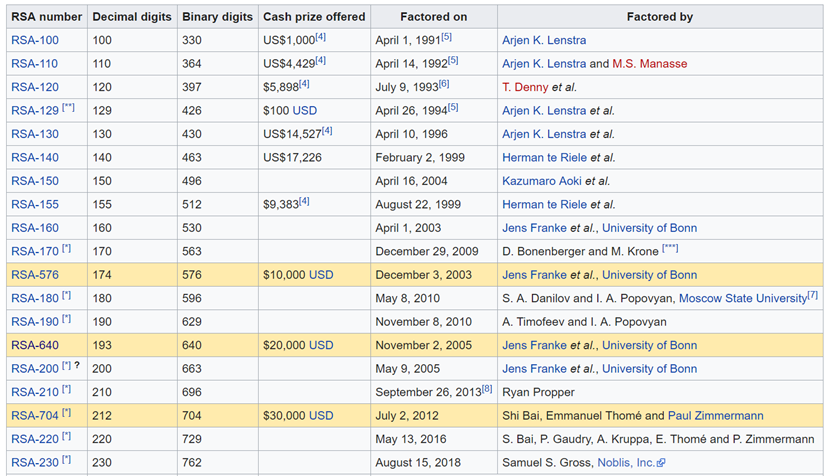

### Einige Mehoden zur Faktorisierung stellen wir hier kurz vor. Die notwendigen Scripte sollen hier vervollständigt werden. Als Algorithmen sind : 
* Fermat
* Trail Division Methode
* Pollard Rho 

### als Sripte realisiert.


### Fermat
#### Diese Methode beruht auf der Darstellung einer ungeraden Ganzzahl als Differenz zweier Quadrate. 
### $$\color{Red}{N = a^{2}-b^{2}= (a+b)\cdot (a-b)}$$
#### Flussdigramm für den Fermat-Algorithmus!
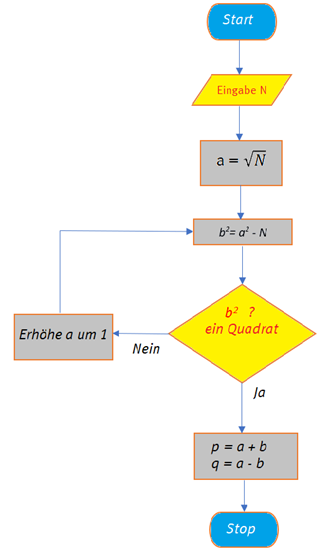

#### Für die Umsetzung benutzen wir in unserem Script die Bibliothek "gmpy2", welche als C-coded Python-Modul mehrfach genauere Berechnungen durchführen kann. Im Script wird die Funktion "assert" verwendet, die einen Test der Bedingung durchführt und eine Fehlermeldung bei Verletzung ausgibt und das Programm dann stoppt. Ist die Bedingung erfüllt, geht das Programm zur nächsten Zeile weiter.
### Aufgabe 1
Modifizieren Sie das folgende Script, so dass Sie für die N's die Primefaktoren berechnen können:
* 838042357
* 4558949651
* 995994067813
* 648893181246694651
* 814623947620945703
* 450014929793889303953 (nur für Pollard roh)


In [6]:
import gmpy2 as gm
import time

N = int(input ("Bitte N eingeben: "))
print ("Modul = {}".format(len(str(N))))

def fermat_factor(n):
    assert n % 2 != 0
    

    a = gm.isqrt(n)
    b2 = gm.square(a) - n

    while not gm.is_square(b2):
        a += 1
        b2 = gm.square(a) - n

    p = a + gm.isqrt(b2)
    q = a - gm.isqrt(b2)

    return int(p), int(q) 

if __name__ == "__main__":
    start = time.time()
    (p, q) = fermat_factor(N)
    print ("Berechnungszeit : ",time.time()-start)

    print("p = {}".format(p), "Länge p = ",len(str(p)))
    print("q = {}".format(q),"Länge p = ",len(str(q)))
    Modul = p * q
    print ("Modul p * q = ", Modul, "\nModul ist {} Zeichen lang!".format(len(str(Modul))))


Bitte N eingeben: 450014929793889303953
Modul = 21
Berechnungszeit :  31.47152543067932
p = 23259689399 Länge p =  11
q = 19347417847 Länge p =  11
Modul p * q =  450014929793889303953 
Modul ist 21 Zeichen lang!


### Unser nächstes Script beschreibt das Trail-Division Verfahren bzw. die Probedivisionen.
### Aufgabe 2
Testen Sie dieses Script für die selben N's aus Aufgabe 1. Vergleichen Sie die Laufzeiten für die entsprechend langen Zahlen.

In [9]:
import decimal
import math
import time

def trial_division (n):
	
    a = []               
    p = 3                
    while n > 1:         
        if n % p == 0:             
            a.append(p)      
            n //= p              
            print ("1. Prime :",n)
            if n < p:
                return a
        else:                
            p += 2
                    
    return a  

n =int(decimal.Decimal (input("Moduleingabe: ")))

print ("Modul = {}".format(len(str(N))))
t0= time.time()
#faktor = trial_division(n)

print ("Die Faktoren sind : ", trial_division(n), "Laufzeit :",time.time()-t0)

Moduleingabe: 450014929793889303953
Modul = 21


KeyboardInterrupt: 

### Unser nächster Mechanismus demonstriert den Algorithmus nach Pollard.
* 1975 von John M. Pollard
* Probabilistisches (Wahrscheinlichkeitsaussage) Verfahren, Analyse basiert auf Annahmen
* auch als Monte Carlo Factorization
* Laufzeit abhängig von der Größe der Primfaktoren 
* 1980 von Richard P. Brent verbessert
Faktorisierung erfolgt durch Iteration eines Polynoms 
### $$\color{Red}{x_{i}=x_{i-1}^{2}+c}$$ 
zu einem hochkomplexen composite Q in der Hoffnung einen gemeinsamen Faktor zu n zu finden.
Es werden sogenannte Triple verwendet. Durch Multiplikationen hängt das nächste von vorhergehenden Ergebnissen ab. Teilergebnisse wiederholen sich in Form Zeichens Rho.
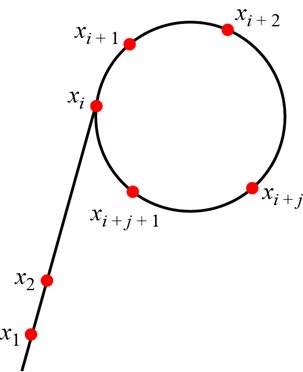

In [11]:
import math
import decimal

def rho ( n ) :
    x = 2
    y = 2
    d = 1
    while d<=1:
        x = ( x * x + 23) % n
        y = ( y * y + 23) % n
        y = ( y * y + 23) % n
        d = math.gcd (x - y, n)      #ggt
    return d

modul=int (decimal.Decimal(input ("Geben Sie bitte Ihr Modul n ein: "))) # Eingabe auch als xeyy
print ("Modul hat {} Zeichen!".format(len(str(N))))
t0= time.time()
prim_fak = rho (modul)
print ("Berechnungszeit : ",time.time()-t0)
print ("Ihre Faktoren sind : ", prim_fak, int(modul / prim_fak))

Geben Sie bitte Ihr Modul n ein: 1627909
Modul hat 21 Zeichen!
Berechnungszeit :  0.0
Ihre Faktoren sind :  569 2861


### Aufgabe 3
Im Wiresharkfile RSA-4.pcap finden Sie die Übertragung einer verschlüsselten Ziffer und die Übermittlung des öffenntlichen Schlüssels. Versuchen Sie eine Entschlüsselung der Geheimzahl.
Nachfolgendes Script ermöglicht den einfachen RSA-Mechanismus!

In [ ]:
%cd "C:\Program Files\Wireshark" 
# Modifizieren Sie die Pfadangabe entsprechend !!
!! wireshark -r "C:\Users\Uwe\Documents\Ausbildung\Hochschule\Krypto-AI\Lab-Übung\Kryptoanalyse\Kryptoanalyse-III\RSA_4.pcapng"

#### Bitte beenden Sie nach der Analyse Wireshark!!

In [ ]:
import math
import decimal
import sys

def rsa_encrypt(n,e,x):                         #RSA Verschlüsselung
    y=x**e % n
    return (y)

def rsa_decrypt ( n , d , y ) :                 #RSA Entschlüsselung
    x = y* d % n
    return x

def rsa_key ( p , q, e ) :                         #RSA Key-Generierung
    n= p * q
    phi_n = (p-1)*(q-1)
    #e = 2
      
    while math.gcd (e, phi_n) > 1:
        e = e+1
          
    d = 0
    h = 2
    while h !=1 :
        d = d + 1
        h = e * d % phi_n
           
    return (n , e , d , phi_n )

def verschlüsseln() :  
    
    print ("\n######### Verschlüsselung Ziffer #########\n")
           
    klar=int(input("Klartexteingabe (Ziffer) bitte: "))
    z = int(input ("1 für öffentl.: 2 private :"))
    x= rsa_encrypt(keys[0],keys[z],klar)
    print ("\nDeine geheime Ziffer : \n", x)
    return()

def entschlüsseln() :
    
    print ("\n####### Decrypt Ziffern  #########")
           
    z = int(decimal.Decimal (input ("Decryption Key:  1 pub, 2 pri:")))
    n = int(decimal.Decimal (input("Modul : ")))
    y = int(decimal.Decimal (input("Geheim-dezimal: ")))
    print ("\nDecrypt:", rsa_decrypt ( n , keys[z] , y ),"\n")
    return()

def keybilden():
    global keys
    p = int (decimal.Decimal (input ("Bitte Primzahlen eingeben p = ")))
    #Primzahltest sollte folgen 
    q = int (decimal.Decimal (input ("Bitte Primzahlen eingeben q = ")))
    #Primzahltest sollte folgen 
    e = int (decimal.Decimal (input ("Bitte öffentliches e bzw. Startpunkt e = ")))
    
    keys = rsa_key (p,q,e)
    print ("\nDie Keys lauten n, e, d, phi_n " , keys )
    return()

def auswahl_fkt ():
    
    auswahl = int (input ("Stop 0 \nKeybilden 1 \nVerschlüsseln 2 \nEntschlüssel 3\nAuswahl 6 :\n"))
    
    if auswahl == 1:
        keybilden()
    else:
        if auswahl == 2:
            verschlüsseln()
        else:
            if auswahl == 3:
                entschlüsseln()
            else:
                if auswahl == 6:
                    auswahl_fkt()
                else:                        
                    sys.exit(0)
while True:
    auswahl_fkt() 
    
#Wireshark
#Hier die verschluesselte Ziffer nach RSA (zwischen Pipes): |1293627|
#Hier die Parameter, diese befinden sich zwischen den beiden Pipes und gehoeren nicht zum RAS-Key.Der RSA-Key hat folgende Syntax: n, Key.
#|1627909,61|

#Die Keys lauten n, e, d, phi_n  (1627909, 61, 1331541, 1624480)
#Decrypt: 829763 

Stop 0 
Keybilden 1 
Verschlüsseln 2 
Entschlüssel 3
Auswahl 6 :
1
Bitte Primzahlen eingeben p = 569
Bitte Primzahlen eingeben q = 2861
Bitte öffentliches e bzw. Startpunkt e = 61

Die Keys lauten n, e, d, phi_n  (1627909, 61, 1331541, 1624480)
Stop 0 
Keybilden 1 
Verschlüsseln 2 
Entschlüssel 3
Auswahl 6 :
3

####### Decrypt Ziffern  #########
Decryption Key:  1 pub, 2 pri:2
Modul : 1331541
Geheim-dezimal: 1293627

Decrypt: 0 

Stop 0 
Keybilden 1 
Verschlüsseln 2 
Entschlüssel 3
Auswahl 6 :
3

####### Decrypt Ziffern  #########
Decryption Key:  1 pub, 2 pri:2
Modul : 1627909
Geheim-dezimal: 1293627

Decrypt: 829763 

